<a href="https://colab.research.google.com/github/whyeon92/ESAA_YB/blob/Code_Study/ESAA_HW0318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn 라이브러리 - 고급 그래프 도구

In [1]:
#라이브러리 불러오기
import seaborn as sns

#titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

Seaborn: Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전  
비교적 단순한 인터페이스! 그리고 취향차이지만 matplotlib보다 좀 더 깔끔한 느낌...

### 회귀선이 있는 산점도
`regplot(x, y, data)`  
 -> x, y축과 데이터 입력으로 산점도+회귀선 생성  
 -> fit_reg = False 설정시 회귀선 안보임

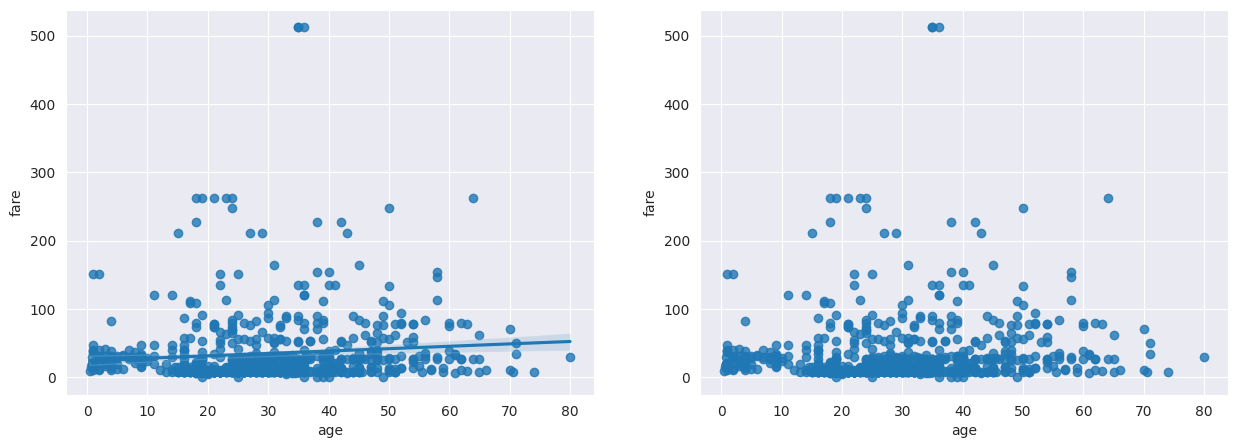

In [4]:
#라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지: darkgrid. whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

#그래프 그리기 - 선형회귀선 표시(fit_reg = True)
sns.regplot(x = 'age',  #x축 변수
            y = 'fare',  # y축 변수
            data = titanic,  #데이터,
            ax = ax1)  #axe 객체 -1번째 그래프

#그래프 그리기 - 선형회귀선 미표시(fit_reg = False)
sns.regplot(x = 'age',  #x축 변수
            y = 'fare',  # y축 변수
            data = titanic,  #데이터,
            ax = ax2,  #axe 객체 - 2번째 그래프
            fit_reg = False)

plt.show()

### 히스토그램/커널 밀도 그래프
`distplot()`  
-> 하나의 변수 데이터 분포를 확인할 때 사용  
-> 기본적으로 히스토그램과 커널 밀도함수 출력  
-> hist = False : 히스토그램 없이 출력  
-> kde = False : 커널 밀도 그래프 없이 출력  

-> 밀도는 displot, 히스토그램은 histplot으로 사용 가능 (두개 다 동시에 쓸라고 distplot 사용하는 듯..?)


<ipython-input-5-d35f974eeb30>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax = ax1)


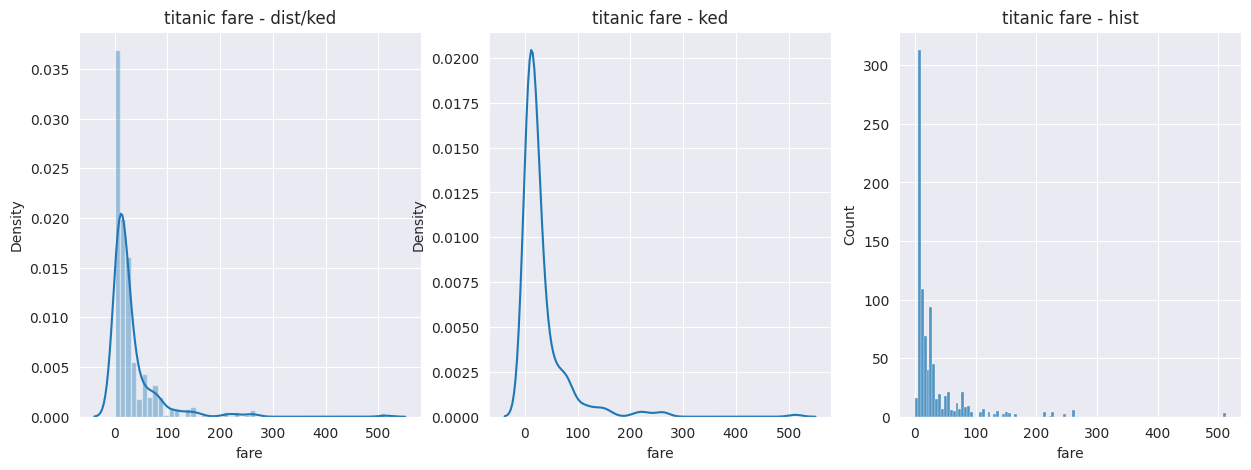

In [5]:
#그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

#distplot
sns.distplot(titanic['fare'], ax = ax1)

#kdeplot
sns.kdeplot(x = 'fare', data = titanic, ax = ax2)

#histplot
sns.histplot(x = 'fare', data = titanic, ax = ax3)

#차트 제목 표시
ax1.set_title('titanic fare - dist/ked')  #책 오타. *hist -> dist
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

### 히트맵
`heatmap(table)`  
-> 피봇테이블을 사용해서 2개의 범주형 변수를 각각 행 열로 재구분하여 정리하고 그 테이블을 인자로 넣음  
-> annot = True : 데이터 값 표시 True  
-> fmt = 'd' : 정수형 포맷  
-> cmap = '~' : 컬러 맵 지정  
-> linewidth : 구분 선 크기 지정  
-> cbar = True : 컬러 바 표시 여부

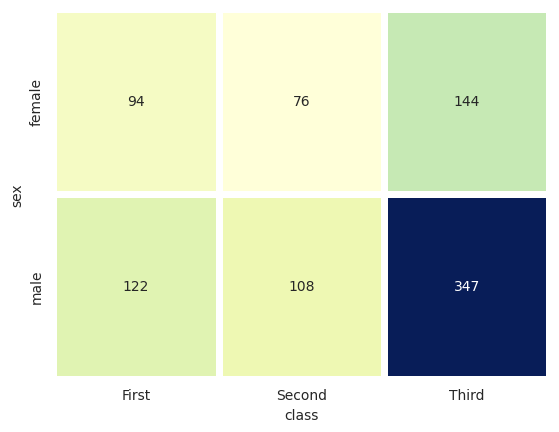

In [7]:
#피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns = ['class'], aggfunc = 'size')

#히트맵 그리기
sns.heatmap(table, #데이터프레임
            annot = True, fmt = 'd',  #데이터 값 표시 여부, 정수형 포맷
            cmap = 'YlGnBu',  #컬러 맵
            linewidth = 5,  #구분 선
            cbar = False)  #컬러 바 표시 여부

plt.show()

### 범주형 데이터의 산점도

범주형 변수에 들어 있는 각 범주별 데이터 분포 확인  
`stripplot()` : 기본형  
`swarmplot()` : 분산 고려, -> 데이터 포인트가 중복되지 않도록, 퍼짐 정도를 입체적으로 볼 수 있게 함.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


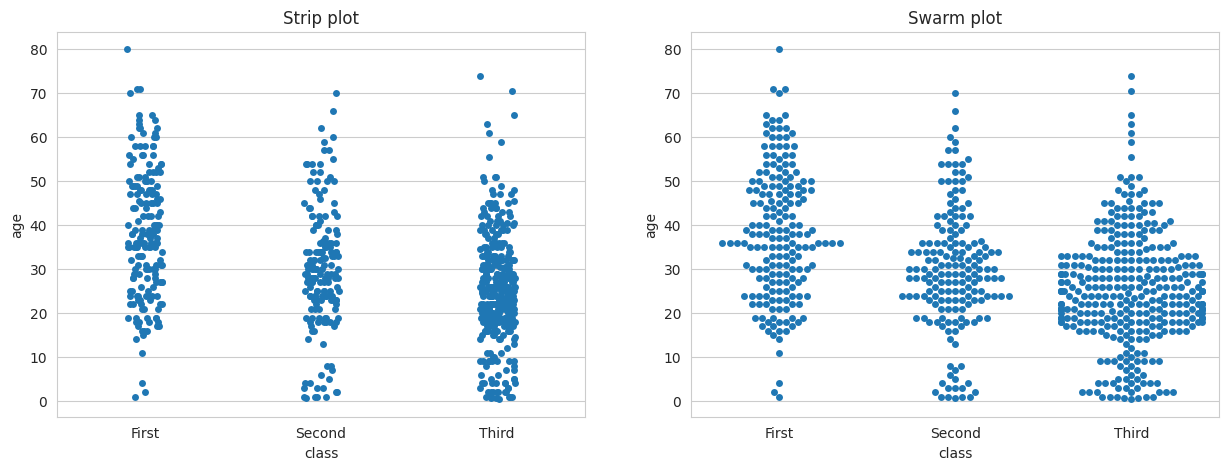

In [8]:
#라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지: darkgrid. whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

#이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 O)
sns.stripplot(x = 'class',  #x축 변수
              y = 'age',  # y축 변수
              data = titanic,  #데이터셋 - 데이터 프레임
              ax = ax1)  #axe 객체 -1번째 그래프

#이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 X)
sns.swarmplot(x = 'class',  #x축 변수
              y = 'age',  # y축 변수
              data = titanic,  #데이터셋 - 데이터 프레임
              ax = ax2)  #axe 객체 -2번째 그래프

#차트 제목 표시
ax1.set_title('Strip plot')
ax2.set_title('Swarm plot')  #*Strip plot -> Swarm plot 아니 도대체 왜 Swarm plot 잘만써놓고 정작 제목엔 스트립이라고 적는겨?

plt.show()

### 막대 그래프
`barplot(x, y, data)`
-> x, y축과 데이터 지정.  
-> hue : x축을 hue변수로 한 번 더 나눠서 막대 그래프 생성 -> 범주형 변수가 인자


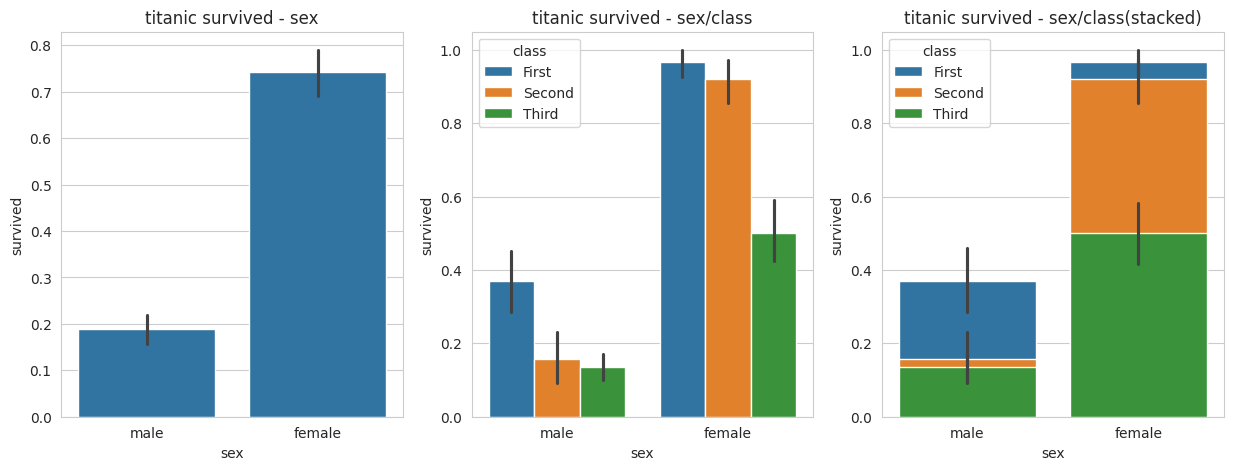

In [10]:
#그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

#x축, y축에 변수 할당
sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)

#x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic, ax = ax2)

#x축, y축에 변수 할당하고 hue 옵션 추가하여 누적 출력
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False, data = titanic, ax = ax3)

#차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

### 빈도 그래프
`countplot(x, data)`  
-> x축과 데이터 지정  
-> hue: x축을 hue변수로 한 번 더 나눠서 그래프 생성 -> 범주형 변수가 인자  
-> dodge = False : 축 방향으로 분리하지 않고 위로 쌓아서 그래프 출력, True면 축 방향으로 그래프 출력

<ipython-input-11-1a2d19f87773>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'class', palette = 'Set1', data = titanic, ax = ax1)


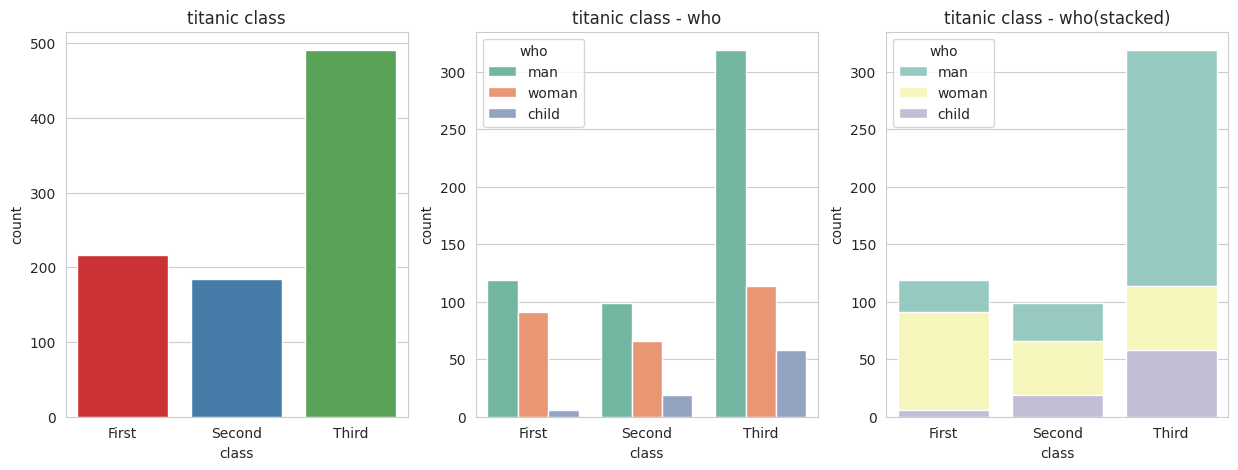

In [11]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#기본값
sns.countplot(x = 'class', palette = 'Set1', data = titanic, ax = ax1)

#hue 옵션에 'who' 추가
sns.countplot(x = 'class', hue = 'who', palette = 'Set2', data = titanic, ax = ax2)

#dodge = False 옵션 추가(축 방향으로 분리하고 않고 누적 그래프 출력)
sns.countplot(x = 'class', hue = 'who', palette = 'Set3', dodge = False, data = titanic, ax = ax3)

#차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

### 박스/바이올린 플롯
`boxplot(x, y, data)`  
`violinplot(x, y, data)`  
-> 위의 그래프들과 마찬가지로 hue 옵션 지정 가능  
-> 박스플롯보다 바이올린 플롯이 데이터의 퍼짐 정도까지 표현하기 좋기에 바이올린이 더 좋음

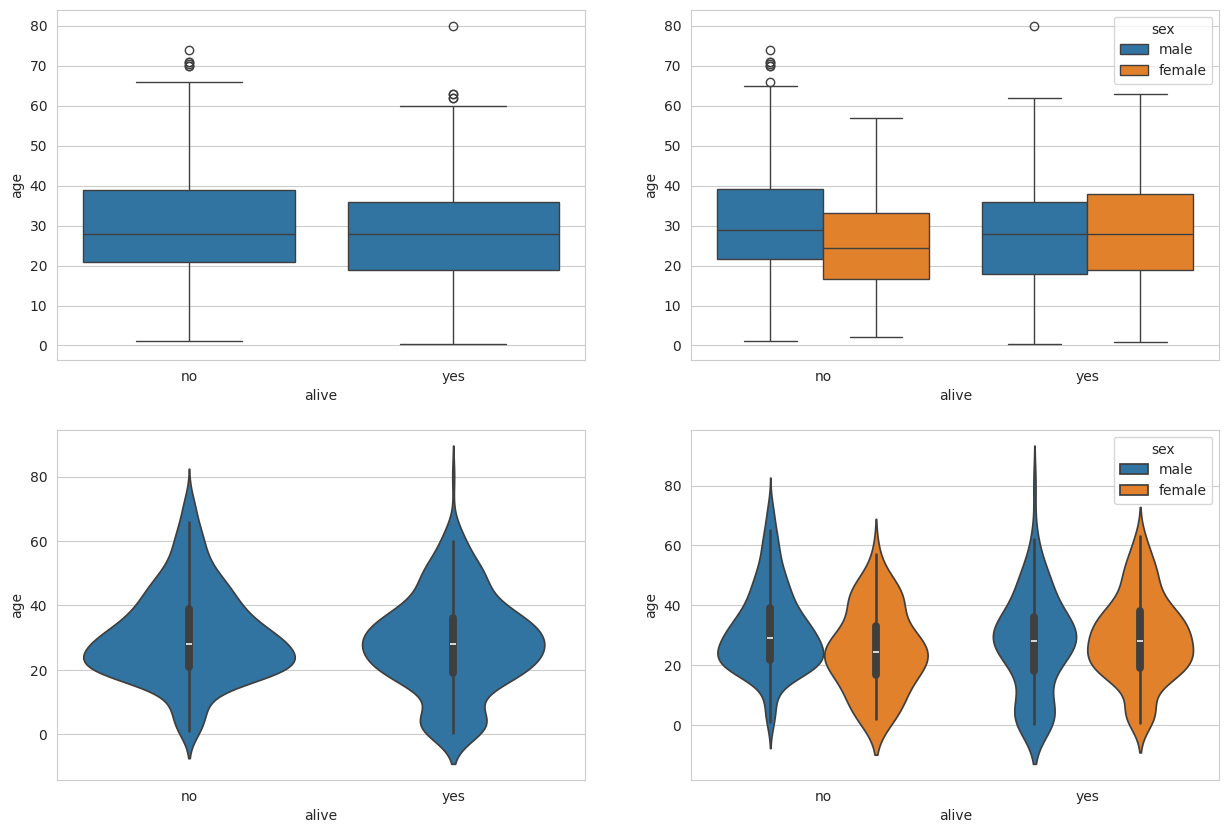

In [12]:
#라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#그래프 객체 생성(figure에 4개의 서브 플롯 생성)
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

#박스 플롯 - 기본값
sns.boxplot(x = 'alive', y = 'age', data = titanic, ax = ax1)

#박스 플롯 - hue 변수 추가   #교재 오타로 주석 순서 바꿈.
sns.boxplot(x = 'alive', y = 'age', hue = 'sex', data = titanic, ax = ax2)

#바이올린 그래프 - 기본값
sns.violinplot(x = 'alive', y = 'age', data = titanic, ax = ax3)

#바이올린 그래프 - hue 변수 추가
sns.violinplot(x = 'alive', y = 'age', hue = 'sex', data = titanic, ax = ax4)

plt.show()

### 조인트 그래프
`jointplot()`  
-> 기본 산점도 + x, y축 변수에 대한 히스토그램 동시에 출력  
-> kind 옵셥
  - = 'reg' -> 회귀선 추가
  - = 'hex' -> 육각 산점도
  - = 'kde' -> 커널 밀집 그래프

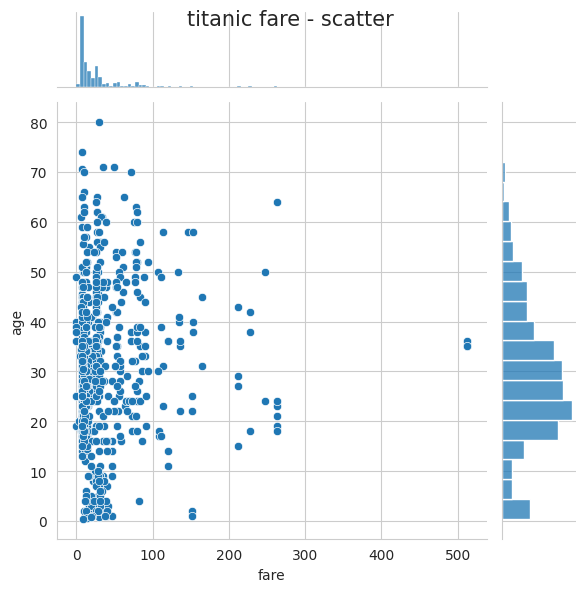

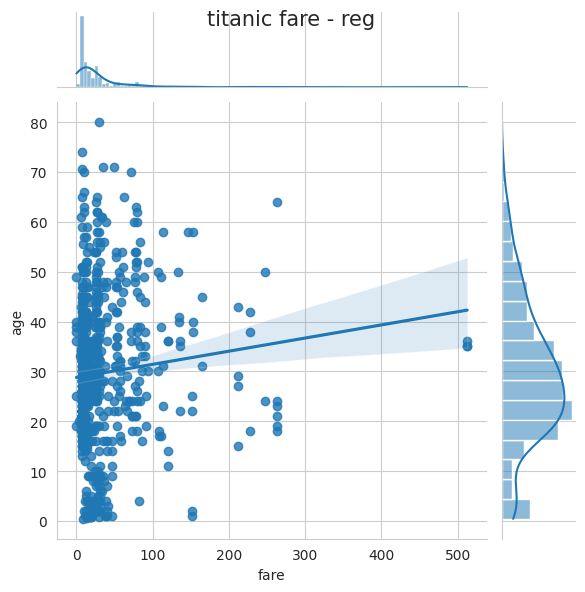

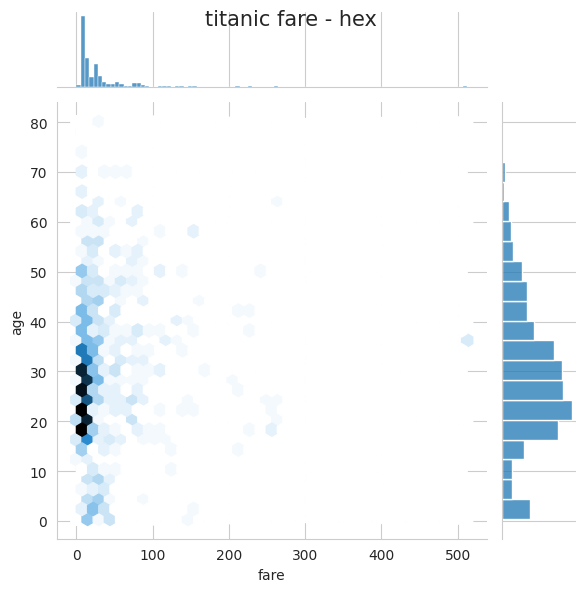

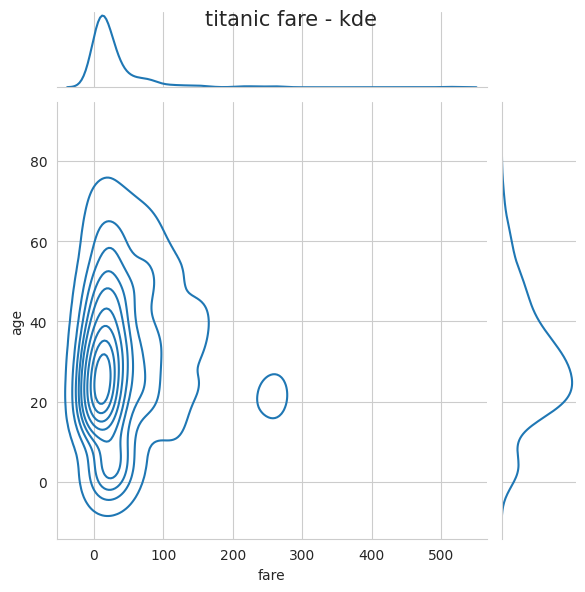

In [13]:
#라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x = 'fare', y = 'age', data = titanic)

#조인트 그래프 - 회귀선
j2 = sns.jointplot(x = 'fare', y = 'age', kind = 'reg', data = titanic)

#조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x = 'fare', y = 'age', kind = 'hex', data = titanic)

#조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x = 'fare', y = 'age', kind = 'kde', data = titanic)

#차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

### 조건을 적용하여 화면을 그리드로 분할하기
`FacetGrid()`  
-> 행, 열 방향으로 서로 다른 조건을 적용하여 여러 서브 플롯 생성  
 -> map 메소드로 그래프 종류를 그리드 객체에 전달  
 아래 예제로 보자면 who의 종류가 열이 되고 survived의 종류가 행이 되어서 그 경우에 해당하는 사람들의 나이에 대한 히스토그램이 생성된 것을 확인 가능하다

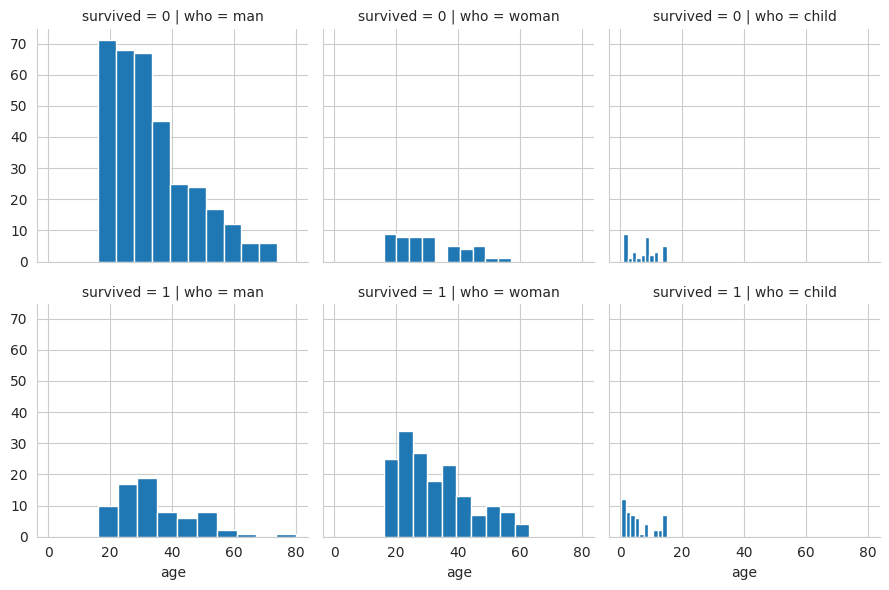

In [14]:
#라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

#스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#조건에 따라 그리드 나누기
g = sns.FacetGrid(data = titanic, col = 'who', row = 'survived')

#그래프 적용하기
g = g.map(plt.hist, 'age')

### 이변수 데이터의 분포
`pairplot()`  
-> 인자로 전달되는 데이터프레임의 열을 두개씩 짝지을 수 있는 모든 조합에 대해 산점도 표현  
-> 자기자신과 만나는 지점은 히스토그램

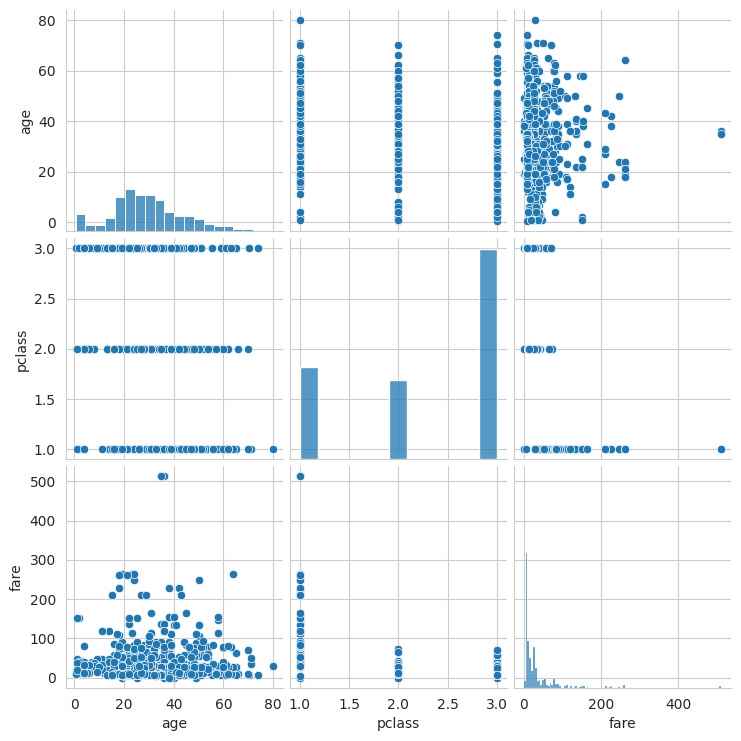

In [15]:
#titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age', 'pclass', 'fare']]

#조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

# Folium 라이브러리 - 지도 활용

### 지도 만들기
`Map(location)`  
-> 해당 라이브러리는 웹 기반 지도를 만들기 때문에,IDE에선 지도 표시가 불가능하며, 웹에서만 확인 가능. -> 여기선 HTML로 확인  
-> location : 위도 경도 표기  
-> zoom_start : 화면 확대 비율 조절



In [27]:
#라이브러리 불러오기
import folium

#서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

#지도를 HTML 파일로 저장하기
seoul_map.save('seoul.html')

In [28]:
seoul_map

### 지도 스타일 적용하기
tiles : 'Stamen Terrain', 'Stamen Toner' 등 옵션 지정 가능. 뒤에 서술하겠지만 여기선 안됨.

In [44]:
folium.TileLayer

folium.raster_layers.TileLayer

In [46]:
#라이브러리 불러오기
import folium

#서울 지도 만들기
seoul_map2 = folium.Map(location = [37.55,126.98], tiles = 'Stamen Terrain',
                        zoom_start = 12)
seoul_map3 = folium.Map(location = [37.55,126.98], tiles = 'Stamen Toner',
                        zoom_start = 15)

#지도를 HTML 파일로 저장하기
seoul_map2.save('seoul2.html')
seoul_map3.save('seoul3.html')

In [47]:
seoul_map2

In [48]:
seoul_map3

####⚠️⚠️⚠️배경 지도가 출력이 안되길래 ⚠️⚠️⚠️

https://velog.io/@slocat/EDA-Folium-%EA%B8%B0%EC%B4%88-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%B7%A8%EC%97%85-%EC%8A%A4%EC%BF%A8-%EC%8A%A4%ED%84%B0%EB%94%94-%EB%85%B8%ED%8A%B8-122 <-이곳과  
https://python-visualization.github.io/folium/latest/reference.html <- 이곳을 참고했으나 결국 해결을 못했습니다.


### 지도에 마커 표시하기
`Marker()`  
-> 인자로 위도, 경도 정보를 리스트형으로 전달  
-> add_to() 로 마커 넣을 지도 지정 가능  
-> `CircleMarker()` : 원형 마크 표기
  - radius : 반지름
  - color : 색상
  - fill : 원 색상 채울지 말지 여부
  - fill_color : 원 채우기 색상
  - fill_opacity : 투명도

In [19]:
#구글 코랩 환경 사용으로 드라이브 마운트 및 디렉터리 설정
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/My Drive/ESAAData/"

Mounted at /content/gdrive/


In [52]:
#라이브러리 불러오기
import pandas as pd
import folium

#대학교 리스트를 데이터프레임 변환
df = pd.read_excel(path + '서울지역 대학교 위치.xlsx', engine = 'openpyxl')

#서울 지도 만들기
#tiles옵션으로 배경 출력이 안되는 것 같아 주석 처리.
#seoul_map = folium.Map(location = [37.55,126.98], tiles = 'Stamen Terrain',
#                        zoom_start = 12)
seoul_map = folium.Map(location = [37.55,126.98],
                        zoom_start = 12)

#대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup = name).add_to(seoul_map)

#지도를 HTML 파일로 저장하기
seoul_map.save('seoul_colleges.html')

In [53]:
seoul_map

In [54]:
#대학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius = 10,   #원의 반지름
                        color = 'brown',  #원의 둘레 색상
                        fill = True,
                        fill_color = 'coral',   #원을 채우는 색
                        fill_opacity = 0.7,  #투명도
                        popup = name
                        ).add_to(seoul_map)

#지도를 HTML 파일로 저장하기
seoul_map.save('seoul_colleges2.html')

In [55]:
seoul_map

### 지도 영역에 단계 구분도 표시하기
`Choropleth()`  
-> 행정구역과 같이 지도 상의 어떤 경계에 둘러싸인 영역의 정보를 나타냄.  
-> 정보의 양(ex. 인구수)가 많아질수록 진한색으로 표시됨

In [56]:
#라이브러리 불러오기
import pandas as pd
import folium
import json

#경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = '경기도인구데이터.xlsx'
df = pd.read_excel(path + file_path, index_col = '구분', engine = 'openpyxl')
df.columns = df.columns.map(str)

#경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = '경기도행정구역경계.json'
try:
    geo_data = json.load(open(path + geo_path, encoding = 'utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding = 'utf-8-sig'))

#경기도 지도 만들기
#tiles옵션으로 배경 출력이 안되는 것 같아 주석 처리.
#g_map = folium.Map(location = [37.5502,126.982],
#                   tiles = 'Stamen Terrain', zoom_start = 9)
g_map = folium.Map(location = [37.5502,126.982],  zoom_start = 9)

#출력할 연도 선택(2007 ~ 2017년 중에서 선택)
year = '2007'

#Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,   #지도 경계
                 data = df[year],    #표시하려는 데이터
                 columns = [df.index, df[year]],  #열 지정
                 fill_color = 'YlOrRd', fill_opacity = 0.7, line_opacity = 0.3,
                 threshold_scale = [10000, 100000, 300000, 500000, 700000],
                 key_on = 'feature.properties.name',
                 ).add_to(g_map)

#지도를 HTML 파일로 저장하기
g_map.save('gyonggi_population_' + year + '.html')

In [57]:
g_map